# Loading the data

In [1]:
import keras.backend as K
from keras.datasets import mnist

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

10739712/11490434 [===========================>..] - ETA: 0s

# Date preprocessing

In [3]:
def reshape(x):
    return x.reshape(-1, 28, 28, 1)

In [4]:
x_train = reshape(x_train)
x_test = reshape(x_test)
x_train.shape

(60000, 28, 28, 1)

# Creating the Archetecture

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, Conv2DTranspose, MaxPooling2D, BatchNormalization, Activation, Flatten, Dense, Dropout, Reshape
from keras.optimizers import Adam

import numpy as np

In [6]:
hidden_size = 128

### encoder

In [7]:
encoder = Sequential(name="encoder")
encoder.add(Conv2D(64, (5, 5), input_shape = (28, 28, 1)))
encoder.add(Activation('relu'))
encoder.add(Conv2D(128, (3,3)))
encoder.add(BatchNormalization())
encoder.add(Conv2D(128, (3,3)))
encoder.add(Activation('relu'))
encoder.add(Flatten())
encoder.add(Dense(1024))
encoder.add(Dropout(0.5))
encoder.add(Dense(256))

### decoder

In [8]:
decoder = Sequential(name="decoder")
decoder.add(Reshape((16, 16, 1),input_shape=(1, 256)))
decoder.add(Conv2DTranspose(64, (3,3)))
decoder.add(Activation('relu'))
decoder.add(Conv2DTranspose(32, (5,5)))
decoder.add(Conv2DTranspose(3, (5,5)))
decoder.add(Activation('relu'))
decoder.add(Conv2DTranspose(1, (3,3)))

### AutoEncoder

In [9]:
auto_encoder = Sequential([
    encoder,
    decoder
])

In [10]:
auto_encoder.compile(Adam(), 'mean_squared_error')

# Training

In [11]:
epochs = 10

In [12]:
auto_encoder.fit(x_train, x_train, epochs=epochs)

Epoch 1/10
60000/60000 [==============================] - 184s - loss: 810.6659   
Epoch 2/10
60000/60000 [==============================] - 180s - loss: 458.5630   
Epoch 3/10
60000/60000 [==============================] - 180s - loss: 400.3996   
Epoch 4/10
60000/60000 [==============================] - 181s - loss: 371.2893   
Epoch 5/10
60000/60000 [==============================] - 181s - loss: 351.6354   
Epoch 6/10
60000/60000 [==============================] - 181s - loss: 338.7810   
Epoch 7/10
60000/60000 [==============================] - 181s - loss: 326.4518   
Epoch 8/10
60000/60000 [==============================] - 181s - loss: 316.9993   
Epoch 9/10
60000/60000 [==============================] - 181s - loss: 307.9810   
Epoch 10/10
60000/60000 [==============================] - 181s - loss: 298.0138   


In [26]:
output = auto_encoder.predict(x_test[0].reshape(1, 28, 28, 1))

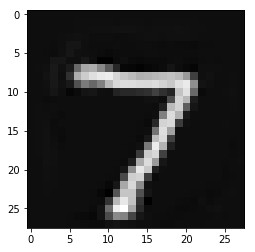

In [27]:
plt.imshow(output.reshape(28, 28), cmap='gray')

In [28]:
auto_encoder.save('auto_encoder.h5')
encoder.save('encoder.h5')
decoder.save('decoder.h5')